## Six-bar Mechanism Balancing

In [1]:
from BetaShF import ShF
from BetaShM import ShM 
import numpy as np 
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### Contraints

$-0.16m <= x_{cn},y_{cn} <= 0.16m$

$0.005m <= t_{cn} <= 0.04m$

### Objective Function

In [2]:
def objective_function(s, ShF, ShM): #c is a constant that distributes the weight among the functions.
    c = 0.5
    return c*ShF(s) + c*ShM(s)

### Differential Evolution

In [3]:
# Bounds for each variable
nVar = 5
bounds = []
for i in range(1,nVar*3+1):
    if(i%3==0): bounds.append([0.005,0.04])
    else: bounds.append([-0.16, 0.16])
print(bounds)


[[-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04], [-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04], [-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04], [-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04], [-0.16, 0.16], [-0.16, 0.16], [0.005, 0.04]]


In [4]:
it = 5
n = 100
sols = np.zeros((n, 2))
best, bestSol = 10, None
for i in range(n):
    r = differential_evolution(objective_function, bounds, args=(ShF, ShM), maxiter=it)
    sols[i][0], sols[i][1] = ShF([*r['x']]), ShM([*r['x']])
    if r['fun'] < best:
        best = r['fun']
        bestSol = r

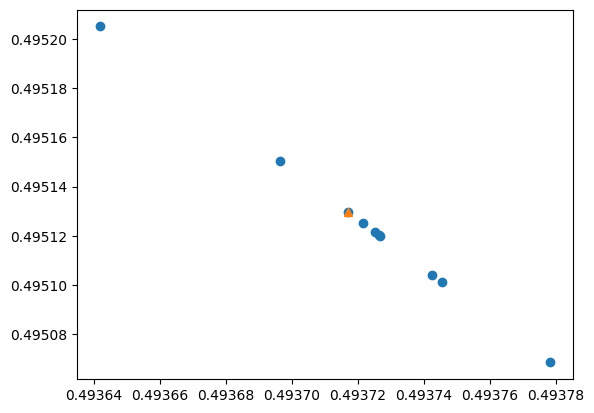

In [5]:
plt.plot(sols[:, 0], sols[:, 1], 'o')
plt.plot(ShF([*bestSol['x']]), ShM([*bestSol['x']]), '^')

In [6]:
np.sqrt(best)

0.7031525142716288

In [7]:
bestSol

     fun: 0.49442345832651324
     jac: array([ 3.14526183e-05,  3.65263375e-05, -5.98459948e-01,  1.13387078e-04,
       -1.02012843e-04, -1.50524038e-04,  1.32005518e-04, -8.03745959e-05,
       -1.66420665e+00,  8.65918448e-05,  1.49191770e-04,  1.66533454e-08,
        1.25371935e-04, -1.76147985e-04,  5.55111512e-09])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 3643
     nit: 10
 success: False
       x: array([-2.53959162e-02, -3.41818255e-02,  4.00000000e-02, -1.03623460e-01,
       -1.09615420e-02,  1.36217135e-02, -5.78430710e-02,  6.23259589e-03,
        4.00000000e-02,  1.99777532e-07,  3.47814279e-07,  2.65570007e-02,
        4.88133590e-07, -6.98043878e-07,  1.30526666e-02])

### Gradient Descent

In [8]:
def gradient_descent(max_iter):
    pass
